### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving forestfires.csv to forestfires (3).csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['forestfires.csv']))

In [5]:
pd.set_option('display.max_columns',None)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df.shape

(517, 31)

In [8]:
len(df)

517

In [9]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [10]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.duplicated().sum()

8

In [13]:
df[df.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
52,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
214,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,large
302,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,small
425,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df[df.duplicated(keep=False)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [16]:
df.shape

(509, 31)

In [17]:
df.month.value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [18]:
df.day.value_counts()

sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64

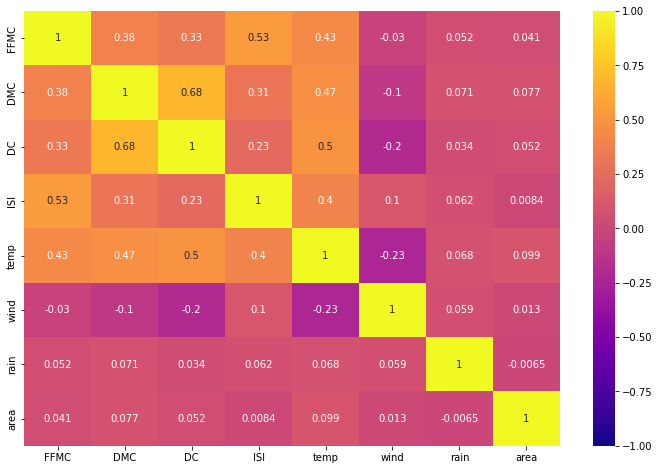

In [19]:
correlation = df.select_dtypes(include='float64').corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,cmap='plasma',
           annot=True);

<font color='purple'><b>From the fig., the burned area of forest has positive correlation with Duff Moisture Code index (DMC) and also high positive correlation with temperature of the area.

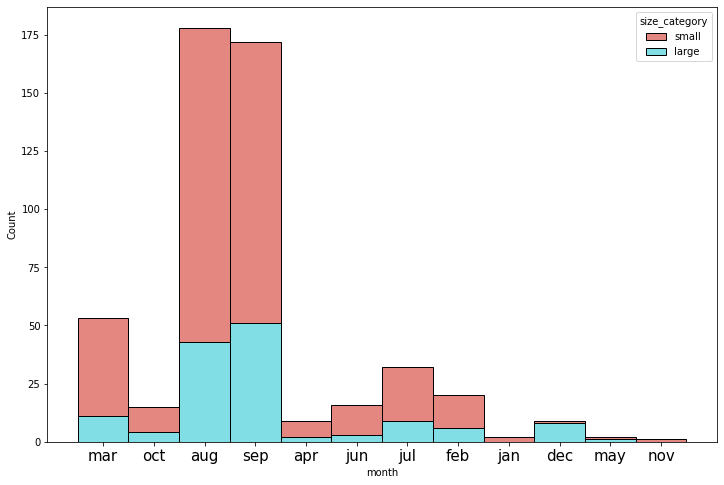

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(binwidth=0.5, x="month", hue="size_category", data=df, stat="count", multiple="stack",palette='hls')
plt.xticks(fontsize=15);

<font color='cyan'><b>From the plot, there were more forest fires during the months of august and september and large areas have been burnt. And there were no large areas burnt during the months of january and november and overall only small areas were burnt.

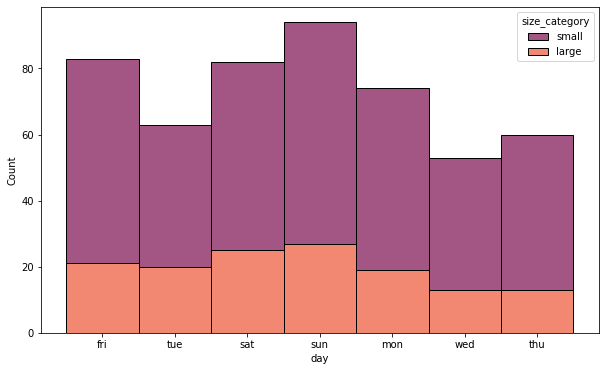

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(x="day", hue="size_category", data=df, stat="count", multiple="stack",palette='rocket');

In [22]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


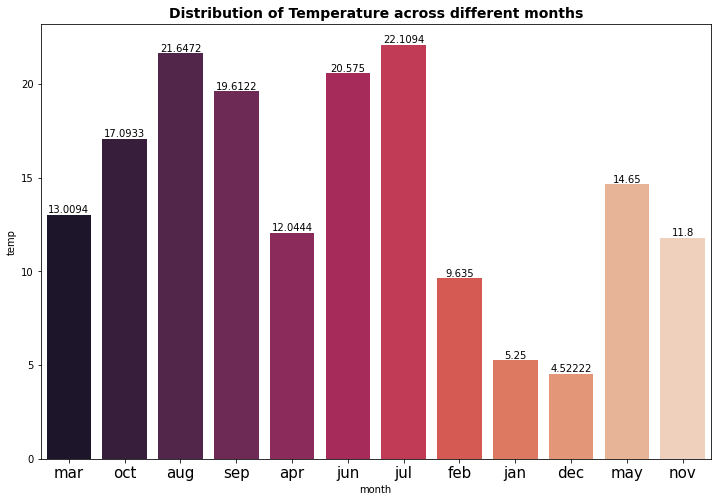

In [23]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='temp', data=df,palette='rocket',ci=None)
plt.title('Distribution of Temperature across different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

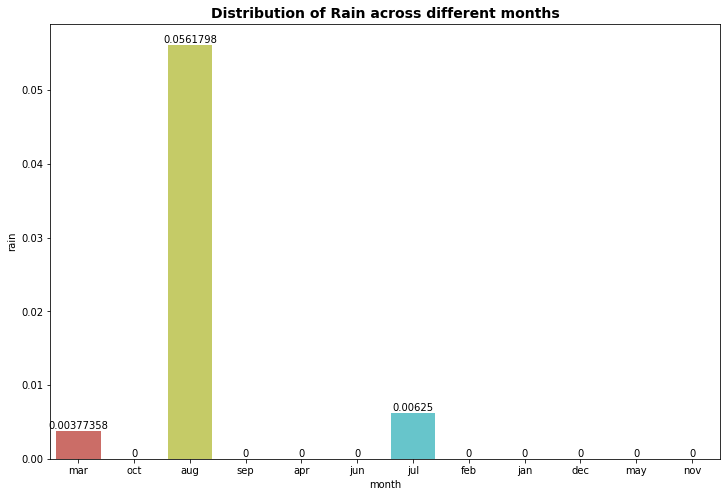

In [24]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='rain', data=df,palette='hls',ci=None)
plt.title('Distribution of Rain across different months',fontsize = 14, fontweight = 'bold');
for i in ax.containers:
    ax.bar_label(i,)

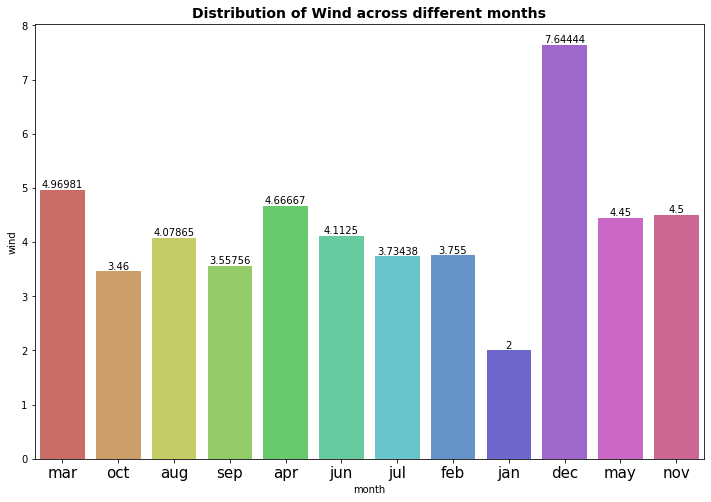

In [25]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='wind', data=df,palette='hls',ci=None)
plt.title('Distribution of Wind across different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

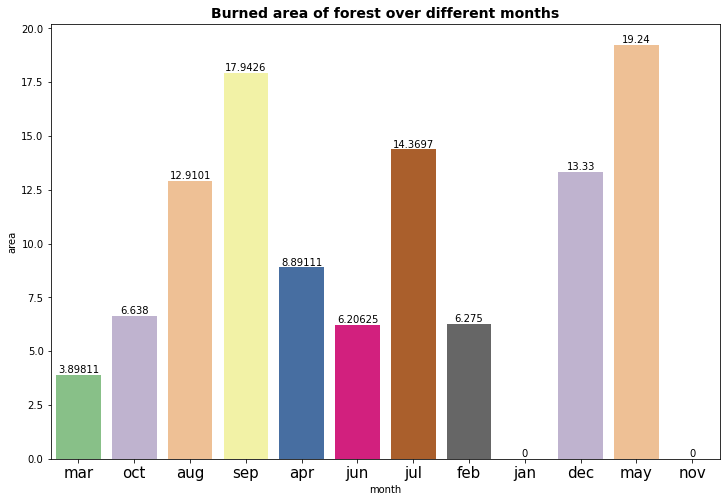

In [26]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='area', data=df,palette='Accent',ci=None)
plt.title('Burned area of forest over different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

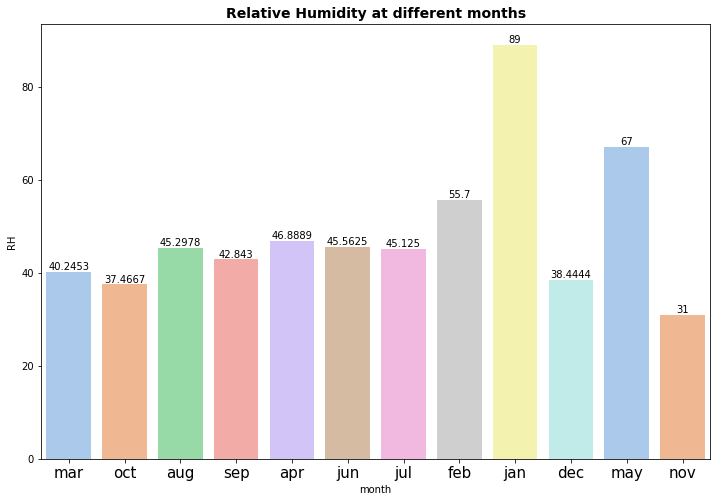

In [27]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y='RH', data=df,palette='pastel',ci=None)
plt.title('Relative Humidity at different months',fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

In [28]:
df.size_category.value_counts()

small    371
large    138
Name: size_category, dtype: int64

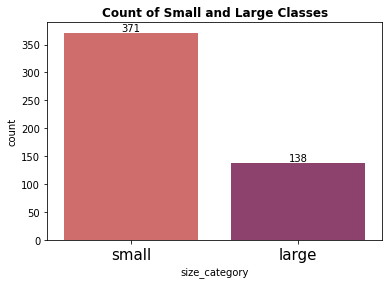

In [29]:
plt.title('Count of Small and Large Classes',fontweight='bold')
ax = sns.countplot(x='size_category',data=df,palette='flare')
plt.xticks(fontsize=15);
for i in ax.containers:
    ax.bar_label(i,)

<font color='peach'><b>There is class imbalance in the data.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
le.fit(df["size_category"])
df["size_category"]=le.transform(df["size_category"])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### <font color='maroon'><b>Split into Independent and Dependent variables :

In [32]:
x = df.drop(['month','day','area','size_category'],axis=1)      # since month and day are already encoded and area categorized
y = df['size_category']

In [33]:
x.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
y.value_counts()

1    371
0    138
Name: size_category, dtype: int64

### <font color='maroon'><b>Train Test Split :

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [37]:
y_train.value_counts()

1    294
0    113
Name: size_category, dtype: int64

In [38]:
y_test.value_counts()

1    77
0    25
Name: size_category, dtype: int64

### <font color='orange'><b>Applying SMOTE to correct the imbalanced data :

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
oversample = SMOTE()

In [41]:
x_train_samp, y_train_samp = oversample.fit_resample(x_train,y_train)

In [42]:
y_train_samp.value_counts()

1    294
0    294
Name: size_category, dtype: int64

### <font color='maroon'><b>Feature Scaling :

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
x_train_scl = scaler.fit_transform(x_train_samp)
x_test_scl = scaler.transform(x_test)

In [46]:
x_train_scl = pd.DataFrame(x_train_scl,columns=x.columns)
x_train_scl.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.006678,-0.443942,-0.754959,-0.793151,0.776241,0.483497,-1.287398,-0.083956,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.19245,-0.182735,0.0,3.804430,-0.150362,-0.317999,-0.041274,-0.041274,-0.138073,-0.701702
1,0.082473,-0.295226,0.790854,-0.181739,-0.582678,0.871085,0.506308,-0.083956,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.19245,-0.182735,0.0,-0.262851,-0.150362,-0.317999,-0.041274,-0.041274,-0.138073,1.425106
2,0.193913,-1.240197,-2.012035,-0.050722,-0.550322,-1.196053,1.316369,-0.083956,2.812311,-0.333963,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.19245,-0.182735,0.0,-0.262851,-0.150362,3.144660,-0.041274,-0.041274,-0.138073,-0.701702
3,0.639670,1.823990,0.667710,-0.181739,1.115970,-0.743866,-0.535198,-0.083956,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,1.392839,-0.19245,-0.182735,0.0,-0.262851,-0.150362,-0.317999,-0.041274,-0.041274,-0.138073,-0.701702
4,0.327640,-0.378879,-0.254818,-0.159903,0.824774,-1.066857,-0.535198,-0.083956,-0.355580,2.994345,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,1.392839,-0.19245,-0.182735,0.0,-0.262851,-0.150362,-0.317999,-0.041274,-0.041274,-0.138073,-0.701702


In [47]:
x_test_scl = pd.DataFrame(x_test_scl,columns=x.columns)
x_test_scl.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.193913,-1.201469,-1.998166,-0.312756,-0.259126,-1.260651,0.795616,-0.083956,2.812311,-0.333963,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.192450,-0.182735,0.0,-0.262851,-0.150362,3.144660,-0.041274,-0.041274,-0.138073,-0.701702
1,-0.497011,-0.333954,0.645855,-0.465609,-0.259126,0.806487,0.795616,-0.083956,-0.355580,2.994345,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.192450,-0.182735,0.0,-0.262851,-0.150362,-0.317999,-0.041274,-0.041274,-0.138073,1.425106
2,0.082473,0.533561,-0.752437,0.757215,0.096782,-0.033288,0.506308,-0.083956,-0.355580,-0.333963,-0.373544,-0.413902,-0.308175,-0.327635,3.316625,-0.124676,-0.717958,-0.192450,-0.182735,0.0,-0.262851,6.650622,-0.317999,-0.041274,-0.041274,-0.138073,-0.701702
3,-1.210222,-1.362579,-0.868016,-1.448236,-2.329858,-1.454445,2.589322,-0.083956,-0.355580,2.994345,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,5.196152,-0.182735,0.0,-0.262851,-0.150362,-0.317999,-0.041274,-0.041274,-0.138073,-0.701702
4,-0.051254,-1.079087,0.549189,-0.552954,-0.097350,-1.196053,-0.535198,-0.083956,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.192450,-0.182735,0.0,-0.262851,-0.150362,-0.317999,-0.041274,-0.041274,7.242551,-0.701702


### <font color='cyan'><b>Feature Selection :

In [48]:
from sklearn.feature_selection import SelectKBest, chi2

In [49]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [50]:
scores = fit.scores_
features = fit.transform(x)

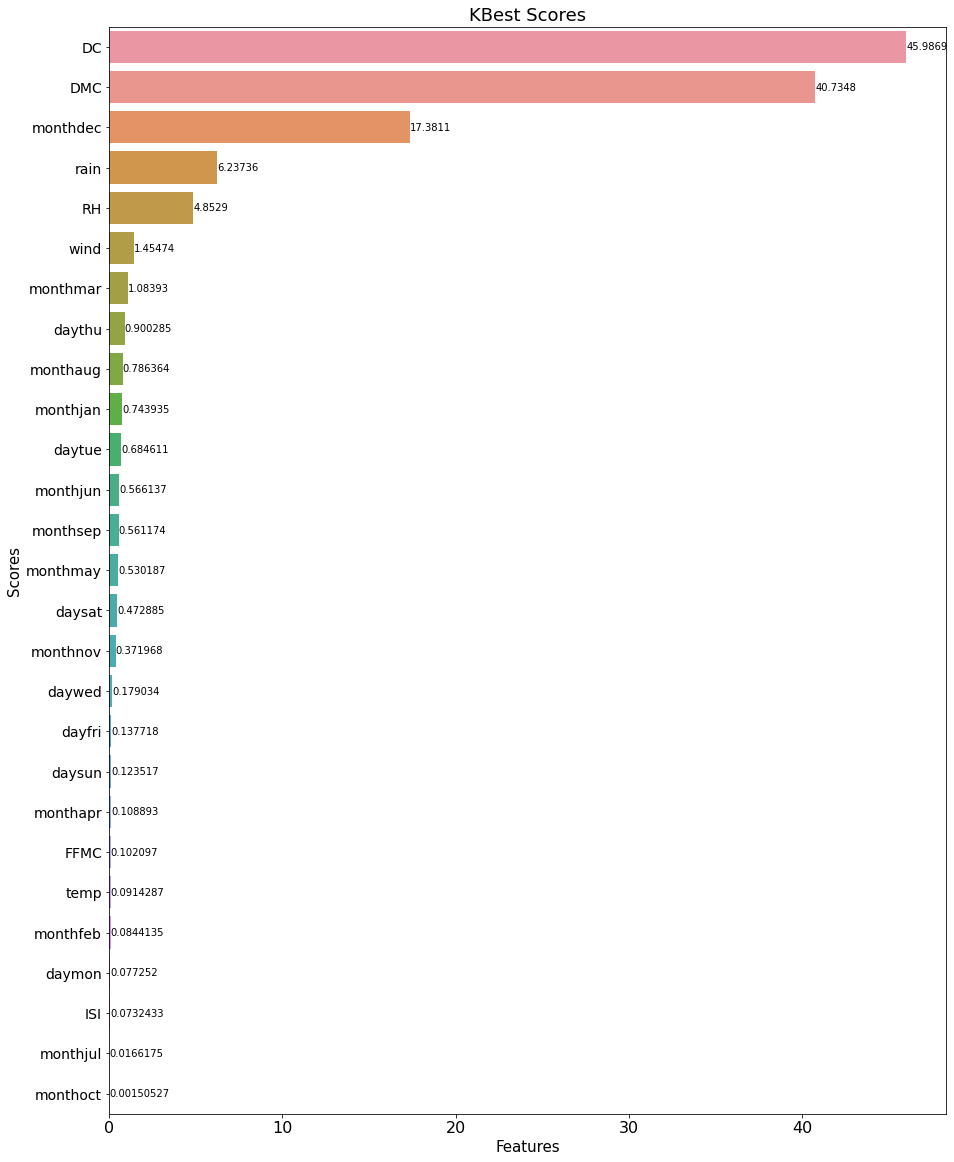

In [51]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)

plt.figure(figsize=(15,20))
# make barplot and sort bars
ax=sns.barplot(x='Score',
            y="Feature", 
            data=score_df, 
            order=score_df.sort_values('Score',ascending=False).Feature)
for i in ax.containers:
    ax.bar_label(i,)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 16)
plt.title("KBest Scores", size=18)
plt.show()

In [52]:
# Dropping those features that have score below 0.5

selector = SelectKBest(k=17)
xk_train = selector.fit_transform(x_train_scl,y_train_samp)
xk_train

array([[-0.4439424 , -0.75495889,  0.48349674, ..., -0.18273455,
        -0.15036188, -0.31799936],
       [-0.29522554,  0.79085379,  0.87108513, ..., -0.18273455,
        -0.15036188, -0.31799936],
       [-1.24019726, -2.01203495, -1.19605295, ..., -0.18273455,
        -0.15036188,  3.14466038],
       ...,
       [ 0.30893671,  0.60256557, -1.32524908, ..., -0.18273455,
        -0.15036188, -0.31799936],
       [-0.03179479,  0.89653885, -0.03328778, ..., -0.18273455,
        -0.15036188, -0.31799936],
       [ 0.2056375 ,  0.0716683 , -1.00225875, ..., -0.18273455,
        -0.15036188, -0.31799936]])

In [53]:
xk = x.copy()
xk = xk.drop(['daymon','monthfeb','temp','FFMC','monthapr','daysun','dayfri','daywed','monthnov','daysat'],axis=1)
xk_train = pd.DataFrame(xk_train,columns=xk.columns)
xk_train.head()

,DMC,DC,ISI,RH,wind,rain,daythu,daytue,monthaug,monthdec,monthjan,monthjul,monthjun,monthmar,monthmay,monthoct,monthsep
0,-0.443942,-0.754959,0.483497,-1.287398,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.19245,-0.182735,-0.150362,-0.317999
1,-0.295226,0.790854,0.871085,0.506308,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.19245,-0.182735,-0.150362,-0.317999
2,-1.240197,-2.012035,-1.196053,1.316369,2.812311,-0.333963,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.19245,-0.182735,-0.150362,3.144660
3,1.823990,0.667710,-0.743866,-0.535198,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,1.392839,-0.19245,-0.182735,-0.150362,-0.317999
4,-0.378879,-0.254818,-1.066857,-0.535198,-0.355580,2.994345,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,1.392839,-0.19245,-0.182735,-0.150362,-0.317999


In [54]:
xk.shape

(509, 17)

In [55]:
xk_test = selector.transform(x_test_scl)

In [56]:
xk_test = pd.DataFrame(xk_test,columns=xk.columns)
xk_test.head()

,DMC,DC,ISI,RH,wind,rain,daythu,daytue,monthaug,monthdec,monthjan,monthjul,monthjun,monthmar,monthmay,monthoct,monthsep
0,-1.201469,-1.998166,-1.260651,0.795616,2.812311,-0.333963,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.192450,-0.182735,-0.150362,3.144660
1,-0.333954,0.645855,0.806487,0.795616,-0.355580,2.994345,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.192450,-0.182735,-0.150362,-0.317999
2,0.533561,-0.752437,-0.033288,0.506308,-0.355580,-0.333963,-0.373544,-0.413902,-0.308175,-0.327635,3.316625,-0.124676,-0.717958,-0.192450,-0.182735,6.650622,-0.317999
3,-1.362579,-0.868016,-1.454445,2.589322,-0.355580,2.994345,-0.373544,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,5.196152,-0.182735,-0.150362,-0.317999
4,-1.079087,0.549189,-1.196053,-0.535198,-0.355580,-0.333963,2.677063,-0.413902,-0.308175,-0.327635,-0.301511,-0.124676,-0.717958,-0.192450,-0.182735,-0.150362,-0.317999


## <font color='purple'><b>Artificial Neural Network :

## <font color='magenta'><b>Keras Classifier :

In [57]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [58]:
x.shape

(509, 27)

### <font color='magenta'><b><I>Using Keras Tuner to get the number of layers and number of neurons at each layer of neural network :

In [59]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [61]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model
  


In [62]:
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,  
                     executions_per_trial=3,
                     directory='project',
                     project_name='Forest Fire')

In [63]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [64]:
tuner.search(x_train_scl,y_train_samp,epochs=100, validation_data=(x_test_scl,y_test))

In [65]:
tuner.results_summary()

Results summary
Results in project/Forest Fire
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 11
units_0: 448
units_1: 352
learning_rate: 0.0001
units_2: 512
units_3: 96
units_4: 96
units_5: 160
units_6: 480
units_7: 416
units_8: 352
units_9: 128
units_10: 64
units_11: 384
units_12: 448
units_13: 480
units_14: 128
units_15: 320
units_16: 160
units_17: 160
units_18: 160
Score: 0.7777777711550394
Trial summary
Hyperparameters:
num_layers: 12
units_0: 64
units_1: 448
learning_rate: 0.0001
units_2: 32
units_3: 416
units_4: 192
units_5: 224
units_6: 416
units_7: 448
units_8: 224
units_9: 96
units_10: 256
units_11: 128
units_12: 512
units_13: 224
units_14: 320
units_15: 384
units_16: 416
units_17: 448
units_18: 448
Score: 0.7745098074277242
Trial summary
Hyperparameters:
num_layers: 17
units_0: 352
units_1: 448
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13

<font color='peach'><b>The best accuracy here is 77.7% for number of layers 11 and the respective neurons as above and learning rate=0.001.

### <font color='cyan'><b> Finding the optimal dropout rate, batch_size and epochs :

<font color='cyan'><b><I> Activation function is taken as relu for hidden layers as it best results mostly and sigmoid for the output layer

In [95]:
def create_model(dropout_rate):
    model1 = Sequential()
    model1.add(Dense(160,input_dim=x_train_scl.shape[1],kernel_initializer = 'uniform',activation='relu'))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(480,activation='relu'))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(352,activation="relu"))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(128,activation='relu'))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(160,activation="relu"))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.0001)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [96]:
model1 = KerasClassifier(build_fn = create_model,verbose = 0)

batch_size = [10,20,40]
epochs = [100,200,500]
dropout_rate = [0.5,0.6,0.7,0.8]

param_grid = dict(batch_size = batch_size,epochs = epochs,dropout_rate = dropout_rate)

grid = GridSearchCV(estimator = model1,param_grid = param_grid,cv = KFold(),verbose = 10)

In [97]:
grid_result = grid.fit(x_train_scl,y_train_samp)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START batch_size=10, dropout_rate=0.5, epochs=100................
[CV 1/5; 1/36] END batch_size=10, dropout_rate=0.5, epochs=100;, score=0.322 total time=  30.5s
[CV 2/5; 1/36] START batch_size=10, dropout_rate=0.5, epochs=100................
[CV 2/5; 1/36] END batch_size=10, dropout_rate=0.5, epochs=100;, score=0.381 total time=  28.8s
[CV 3/5; 1/36] START batch_size=10, dropout_rate=0.5, epochs=100................
[CV 3/5; 1/36] END batch_size=10, dropout_rate=0.5, epochs=100;, score=0.415 total time=  30.7s
[CV 4/5; 1/36] START batch_size=10, dropout_rate=0.5, epochs=100................
[CV 4/5; 1/36] END batch_size=10, dropout_rate=0.5, epochs=100;, score=0.675 total time=  30.7s
[CV 5/5; 1/36] START batch_size=10, dropout_rate=0.5, epochs=100................
[CV 5/5; 1/36] END batch_size=10, dropout_rate=0.5, epochs=100;, score=0.983 total time=  42.6s
[CV 1/5; 2/36] START batch_size=10, dropout_rate=0.5,

In [69]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7691293716430664, using {'batch_size': 40, 'dropout_rate': 0.5, 'epochs': 500}
0.7126177191734314,0.04539348408794105 with: {'batch_size': 10, 'dropout_rate': 0.5, 'epochs': 100}
0.7401999235153198,0.13887021593816765 with: {'batch_size': 10, 'dropout_rate': 0.5, 'epochs': 200}
0.7402868390083313,0.1462733019154798 with: {'batch_size': 10, 'dropout_rate': 0.5, 'epochs': 500}
0.497740113735199,0.26261404254032134 with: {'batch_size': 10, 'dropout_rate': 0.6, 'epochs': 100}
0.760538911819458,0.12510100296285512 with: {'batch_size': 10, 'dropout_rate': 0.6, 'epochs': 200}
0.7165000796318054,0.15589463306438273 with: {'batch_size': 10, 'dropout_rate': 0.6, 'epochs': 500}
0.23446327745914458,0.12133089099657056 with: {'batch_size': 10, 'dropout_rate': 0.7, 'epochs': 100}
0.29943502843379977,0.21379535083765772 with: {'batch_size': 10, 'dropout_rate': 0.7, 'epochs': 200}
0.38757062554359434,0.24305213941345832 with: {'batch_size': 10, 'dropout_rate': 0.7, 'epochs': 500}
0.2344632774

<font color='peach'><b>The best accuracy is 77% with batch_size=40, dropout rate=0.5 and epochs=500.

In [98]:
# create ANN model
model2 = Sequential()
model2.add(Dense(160,input_dim=x_train_scl.shape[1],kernel_initializer = 'uniform',activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(480,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(352,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(160,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(units=1,activation="sigmoid"))
    
adam=Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])

# Training the model with best parameters
history = model2.fit(x_train_scl, y_train_samp, validation_split=0.33, batch_size = 40, epochs = 500)

Epoch 1/500
10/10 [==============================] - 2s 42ms/step - loss: 0.7215 - accuracy: 0.4020 - val_loss: 0.7119 - val_accuracy: 0.0462
Epoch 2/500
10/10 [==============================] - 0s 16ms/step - loss: 0.6750 - accuracy: 0.7048 - val_loss: 0.7373 - val_accuracy: 0.0462
Epoch 3/500
10/10 [==============================] - 0s 15ms/step - loss: 0.6543 - accuracy: 0.7201 - val_loss: 0.7726 - val_accuracy: 0.0462
Epoch 4/500
10/10 [==============================] - 0s 16ms/step - loss: 0.6374 - accuracy: 0.7226 - val_loss: 0.8275 - val_accuracy: 0.0462
Epoch 5/500
10/10 [==============================] - 0s 15ms/step - loss: 0.5928 - accuracy: 0.7201 - val_loss: 0.9298 - val_accuracy: 0.0462
Epoch 6/500
10/10 [==============================] - 0s 14ms/step - loss: 0.6200 - accuracy: 0.7226 - val_loss: 0.9397 - val_accuracy: 0.0462
Epoch 7/500
10/10 [==============================] - 0s 15ms/step - loss: 0.5943 - accuracy: 0.7226 - val_loss: 0.8993 - val_accuracy: 0.0462
Epoch 

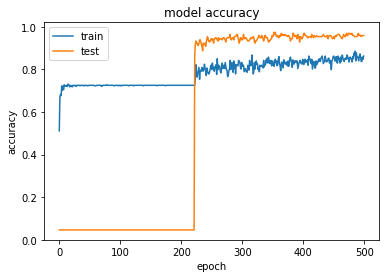

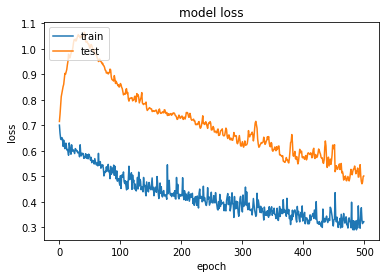

In [78]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:

# generating predictions for train data
y_predict = model2.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

13/13 [==============================] - 0s 8ms/step
Accuracy score for Train Data    =  67.0 %
Confusion Matrix for Train Data  =
 [[  8 105]
 [ 29 265]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.22      0.07      0.11       113
           1       0.72      0.90      0.80       294

    accuracy                           0.67       407
   macro avg       0.47      0.49      0.45       407
weighted avg       0.58      0.67      0.61       407



In [94]:
y_predict_test = model2.predict(x_test_scl) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

4/4 [==============================] - 0s 8ms/step
Accuracy score for Test Data    =  52.0 %
Confusion Matrix for Test Data  =
 [[11 14]
 [35 42]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.24      0.44      0.31        25
           1       0.75      0.55      0.63        77

    accuracy                           0.52       102
   macro avg       0.49      0.49      0.47       102
weighted avg       0.62      0.52      0.55       102



## <font color='maroon'><b>Classification Model using Tensorflow :

In [108]:
import tensorflow as tf
tf.random.set_seed(42)


model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_tf.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history_tf = model_tf.fit(x_train_scl, y_train_samp, epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 5ms/step - loss: 1.3338 - accuracy: 0.5799 - precision: 0.5861 - recall: 0.5442
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.7585 - precision: 0.6891 - recall: 0.9422
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4885 - accuracy: 0.7653 - precision: 0.6902 - recall: 0.9626
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5098 - accuracy: 0.7415 - precision: 0.6715 - recall: 0.9456
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.7755 - precision: 0.7025 - recall: 0.9558
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5259 - accuracy: 0.7687 - precision: 0.7005 - recall: 0.9388
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.7738 - precision: 0.7069 - recall: 0.9354
Epoch 8/100
19/19 [=============================

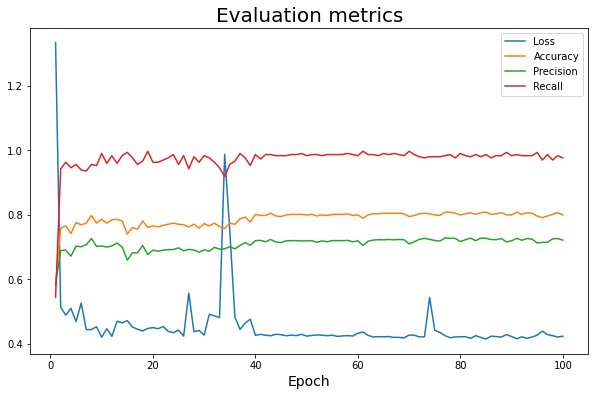

In [113]:
plt.figure(figsize=(10,6))
plt.plot(
    np.arange(1, 101), 
    history_tf.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history_tf.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history_tf.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history_tf.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [111]:
predictions_tf = model_tf.predict(x_test_scl)

4/4 [==============================] - 0s 4ms/step


### <font color='green'><b>Model evaluation on Test data :

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions_tf)
]
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.77
Precision: 0.78
Recall: 0.97
